In [191]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import make_classification

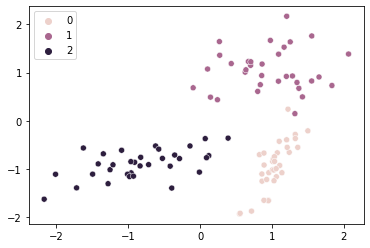

In [192]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, 
                           n_clusters_per_class=1, class_sep=1, random_state=11, flip_y=0)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

## k-means

In [193]:
## Compute distance between two vectors
def vectors_distance(vec1, vec2):
  _sum = 0
  n = len(vec1)
  for i in range(n):
    _sum += (vec1[i] - vec2[i])**2
  return np.sqrt(_sum)

def rand_sample(X, k):
  indices = np.random.randint(low=0, high=len(X), size=k)
  return X[indices,:]

def assign(X, centroids):
  k = len(centroids)
  cluster_sets = [[] for i in range(k)]
  for i in range(len(X)):
    dist = []
    for j in range(k):
      dist.append(vectors_distance(X[i], centroids[j]))
    cluster = dist.index(min(dist))
    cluster_sets[cluster].append(X[i])
  return cluster_sets

def recompute_centroids(cluster_sets):
  centroids = []
  for cluster in cluster_sets:
    cluster = np.array(cluster)
    centroids.append(cluster.mean(axis=0))

  return centroids

def check_centroids_diff(old_centroids, centroids):
  n_centroids = len(old_centroids)
  dim = len(old_centroids[0])

  for i in range(n_centroids):
    for j in range(dim):
      diff = abs(old_centroids[i][j] - centroids[i][j])
      if diff > 0.0001:
        return False
  return True

In [194]:
def kmeans(k):

  plt.figure(figsize=(20,4))
  plt.subplot(1,4,1)
  plt.title(f"k={k}\nInput clusters")
  sns.scatterplot(x=X[:,0], y=X[:,1])

  ## Step1: initialize 'k' centroids 
  centroids = np.array(rand_sample(X, k))
  plt.subplot(1,4,2)
  plt.title(f"k={k}\nInitial Centroids")
  sns.scatterplot(x=X[:,0], y=X[:,1])
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1], label="initial centroids")

  while True:
    ## Step2: Assign points to it's nearest cluster
    cluster_sets = assign(X, centroids)

    ## Step3: Recompute centroids
    old_centroids = centroids
    centroids = np.array(recompute_centroids(cluster_sets))

    ## Step4: Repeate Step2 and Step3 until old and new centroids do not change much
    centroid_diff = check_centroids_diff(old_centroids, centroids)
    if centroid_diff:
      break
  
  plt.subplot(1,4,3)
  plt.title(f"k={k}\nOptimal Centroids")
  sns.scatterplot(x=X[:,0], y=X[:,1])
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1], label="optimal centroids")

  cluster_sets = assign(X, centroids)
  plt.subplot(1,4,4)
  plt.title(f"k={k}\nColoring the clusters")
  for cluster in cluster_sets:
    cluster = np.array(cluster)
    sns.scatterplot(x=cluster[:,0], y=cluster[:,1])

  plt.show()


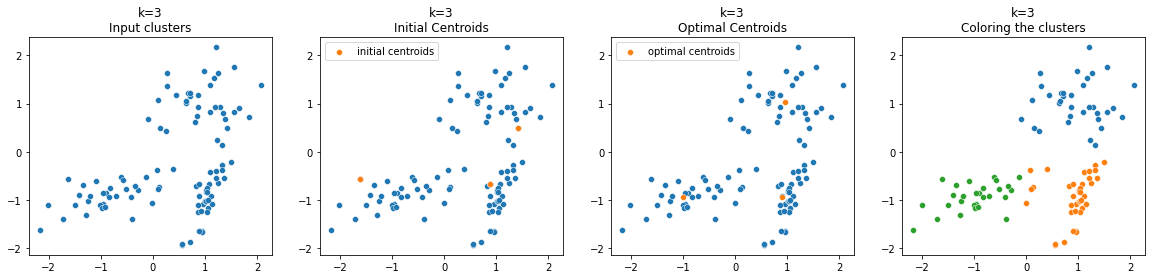

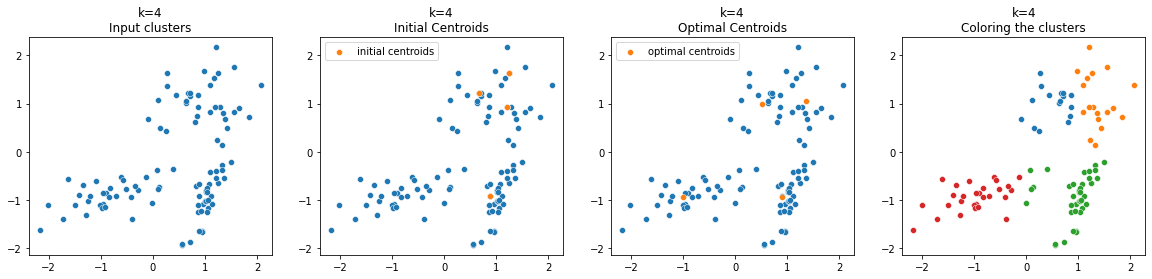

In [199]:
## Running k-means for two values of 'k' and checking the results
kmeans(3)
kmeans(4)